# GDP per Capita

In [2]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = '/Users/saketmanolkar/Desktop/india/gdppercapita.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Assuming you want to fill empty fields with 'NA'
df.fillna('NA', inplace=True)



In [3]:
df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,26515.67808,26942.30798,28421.38649,28451.27374,29326.70806,30918.51522,31902.76258,24487.86357,29342.10073,NA
1,Africa Eastern and Southern,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,210.149894,223.040659,...,1736.222507,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.39172
2,Afghanistan,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,167.165675,134.012768,...,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NA
3,Africa Western and Central,107.423775,112.503866,118.197351,122.77412,131.16376,137.809818,143.601581,128.04965,129.123648,...,2153.766138,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.3488
4,Angola,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,5101.983876,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,3704.562199,3902.52982,3520.780421,3759.47104,4009.356038,4384.190404,4416.031322,4310.932984,5269.783901,5351.439542
262,"Yemen, Rep.",NA,NA,NA,NA,NA,NA,NA,NA,NA,...,1497.747941,1557.601406,1488.416267,1069.816997,893.716573,701.714878,693.816484,583.875663,603.707959,676.928385
263,South Africa,529.561923,543.042224,560.699395,601.599951,642.688431,681.131112,718.118179,775.152812,813.508497,...,7441.230854,6965.137897,6204.929901,5735.066787,6734.475153,7048.508112,6688.774746,5741.641249,7055.055176,6776.480077
264,Zambia,228.567398,216.274674,208.562685,209.453362,236.941713,296.022427,334.672528,350.653425,398.557506,...,1840.320553,1724.57622,1307.909649,1249.923143,1495.752138,1475.199836,1268.120941,956.831748,1137.344395,1487.907764


/Users/saketmanolkar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


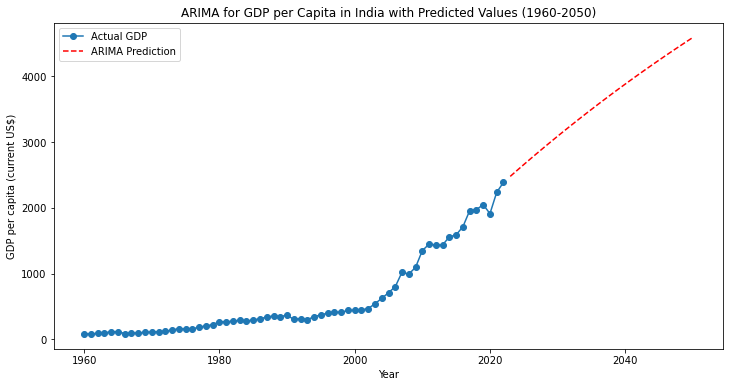

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Select data for India
df_india = df[df['Country Name'] == 'India']

# Drop rows with missing values
df_india = df_india.dropna()

# Extract the years and GDP values without specifying column names
years = df_india.columns[1:].values.astype(int)
gdp_values = df_india.iloc[0, 1:].replace('NA', np.nan).astype(float).values

# Filter data for training only on years 1960 to 2022
start_year = 1960
end_year = 2022
mask = (years >= start_year) & (years <= end_year)

years_train = years[mask]
gdp_values_train = gdp_values[mask]

# Create an ARIMA model
model = ARIMA(gdp_values_train, order=(1, 1, 1))
model_fit = model.fit()

# Predict GDP values for future years (e.g., till 2050)
future_years = np.arange(2023, 2051)
predicted_gdp = model_fit.forecast(steps=len(future_years))

# Visualize the ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(years, gdp_values, label='Actual GDP', marker='o', linestyle='-')
plt.plot(future_years, predicted_gdp, label='ARIMA Prediction', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US$)')
plt.title('ARIMA for GDP per Capita in India with Predicted Values (1960-2050)')
plt.legend()
plt.show()


MAE: 2487.3725259615044
MSE: 6210183.6681463355
R-squared: 0.9472276613083453


/Users/saketmanolkar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


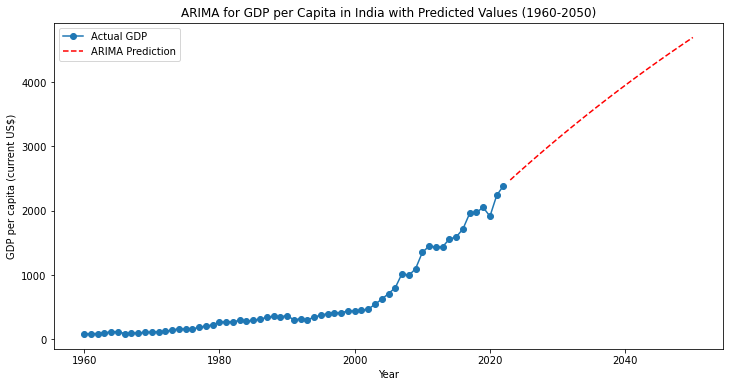

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Select data for India
df_india = df[df['Country Name'] == 'India']

# Drop rows with missing values
df_india = df_india.dropna()

# Extract the years and GDP values without specifying column names
years = df_india.columns[1:].values.astype(int)
gdp_values = df_india.iloc[0, 1:].replace('NA', np.nan).astype(float).values

# Filter data for training only on years 1960 to 2022
start_year = 1960
end_year = 2022
mask = (years >= start_year) & (years <= end_year)

years_train = years[mask]
gdp_values_train = gdp_values[mask]

# Create an ARIMA model
model = ARIMA(gdp_values_train, order=(2, 1, 1))
model_fit = model.fit()

# Predict GDP values for future years (e.g., till 2050)
future_years = np.arange(2023, 2051)
predicted_gdp = model_fit.forecast(steps=len(future_years))

# Calculate and print metrics
mae = mean_absolute_error(gdp_values[-len(future_years):], predicted_gdp)
mse = mean_squared_error(gdp_values[-len(future_years):], predicted_gdp)

# Calculate R-squared
slope, intercept, r_value, p_value, std_err = linregress(gdp_values[-len(future_years):], predicted_gdp)
r_squared = r_value ** 2

# Print metrics
print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r_squared)

# Visualize the ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(years, gdp_values, label='Actual GDP', marker='o', linestyle='-')
plt.plot(future_years, predicted_gdp, label='ARIMA Prediction', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US$)')
plt.title('ARIMA for GDP per Capita in India with Predicted Values (1960-2050)')
plt.legend()
plt.show()


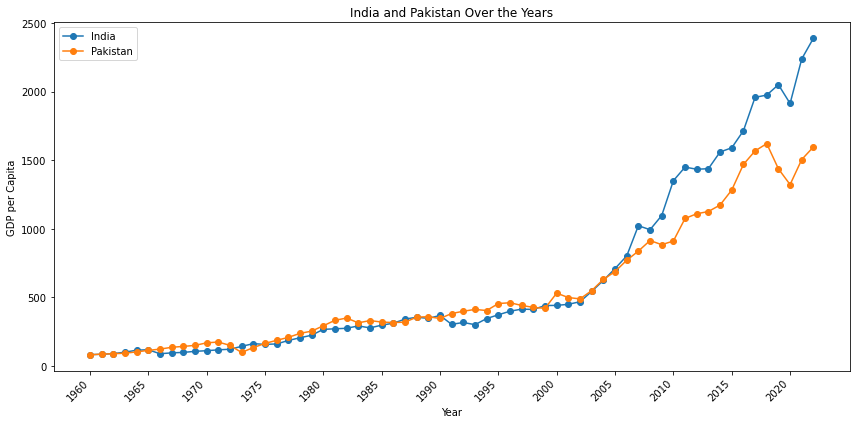

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# You may need to adjust the column names based on your actual DataFrame

# Select data for India and Pakistan
countries_of_interest = ['India', 'Pakistan']
data_selected = df[df['Country Name'].isin(countries_of_interest)].set_index('Country Name').T

# Fill NA values with 0
data_selected.fillna(0, inplace=True)

# Set a larger plot size
plt.figure(figsize=(12, 6))

# Plot a line graph for India
plt.plot(data_selected.index, data_selected['India'], label='India', marker='o', linestyle='-')

# Plot a line graph for Pakistan
plt.plot(data_selected.index, data_selected['Pakistan'], label='Pakistan', marker='o', linestyle='-')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('India and Pakistan Over the Years')
plt.legend()

# Increment x-axis ticks by 5
plt.xticks(range(0, len(data_selected.index), 5), data_selected.index[::5], rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
# Western Europe
western_europe = [
    'Austria', 'Belgium', 'France', 'Germany',
    'Netherlands', 'Switzerland', 'United Kingdom', 'Sweden'
]

# Southern Europe
southern_europe = [
    'Andorra', 'Gibraltar', 'Italy', 'Malta', 'Portugal', 'San Marino', 'Spain'
]

# Northern Europe
northern_europe = [
    'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'Iceland', 'Ireland', 'Latvia', 'Lithuania', 'Greenland'
]

# Eastern Europe
eastern_europe = [
    'Belarus', 'Czechia', 'Hungary', 'Poland', 'Slovenia', 'Moldova', 'Ukraine', 'Romania'
]

# Europe
europe_countries = [
    'Austria', 'Belgium', 'France', 'Germany',
    'Netherlands', 'Switzerland', 'United Kingdom', 'Sweden',
    'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'Iceland', 'Ireland', 'Latvia', 'Lithuania','Greenland'
    'Andorra', 'Gibraltar', 'Italy', 'Malta', 'Portugal', 'San Marino', 'Spain',
    'Belarus', 'Czechia', 'Hungary', 'Poland', 'Slovenia', 'Moldova', 'Ukraine', 'Romania'
]

# Africa
africa_countries = [
    'Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia',
    'South Africa', 'Namibia', 'Botswana', 'Zimbabwe', 'Mozambique', 'Zambia',
    'Nigeria', 'Ghana', 'Senegal', 'Ivory Coast', 'Mali', 'Niger',
     'Kenya', 'Ethiopia', 'Tanzania', 'Uganda', 'Rwanda', 'Sudan',
    'Congo', 'Cameroon', 'Gabon', 'Chad', 'Central African Republic', 'Equatorial Guinea'
    
]

#Noth Afircan Countires
northern_africa_countries = [
    'Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia'
] 

#South african Countries
southern_africa_countries = [
    'South Africa', 'Namibia', 'Botswana', 'Zimbabwe', 'Mozambique', 'Zambia'
]

# West African Countries
west_africa_countries = [
    'Nigeria', 'Ghana', 'Senegal', 'Ivory Coast', 'Mali', 'Niger'
]

# Eastern African Countires
eastern_africa_countries = [
    'Kenya', 'Ethiopia', 'Tanzania', 'Uganda', 'Rwanda', 'Sudan'
]

# Central African Countries
central_africa_countries = [
    'Congo', 'Cameroon', 'Gabon', 'Chad', 'Central African Republic', 'Equatorial Guinea'
]


# Asia
asia_countries = [
    'China', 'India', 'Indonesia', 'Japan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan',
    'Malaysia', 'Pakistan', 'Philippines', 'Singapore', 'Thailand', 'Maldives'
]

#Indian Sub continent
indian_subcontinent_countries = [
    'India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal', 'Bhutan'
]

# North America
north_america_countries = [
    'Canada', 'United States'
]

#Middle East
middle_east_countries = [
     'Bahrain', 'Cyprus', 'Iraq', 'Israel', 'Jordan', 
    'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia'
    , 'United Arab Emirates', 'Jordan'
]

# South America
south_america_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 
    'Ecuador', 'Paraguay', 'Peru', 'Suriname'
]

#Central America
central_america_countries = [
    'Mexico', 'Cuba', 'Guatemala',
    'Honduras', 'Nicaragua', 'Costa Rica', 'Panama', 'Dominican Republic'
]

# Oceania
oceania_countries = [
    'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.', 
    'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa'
]




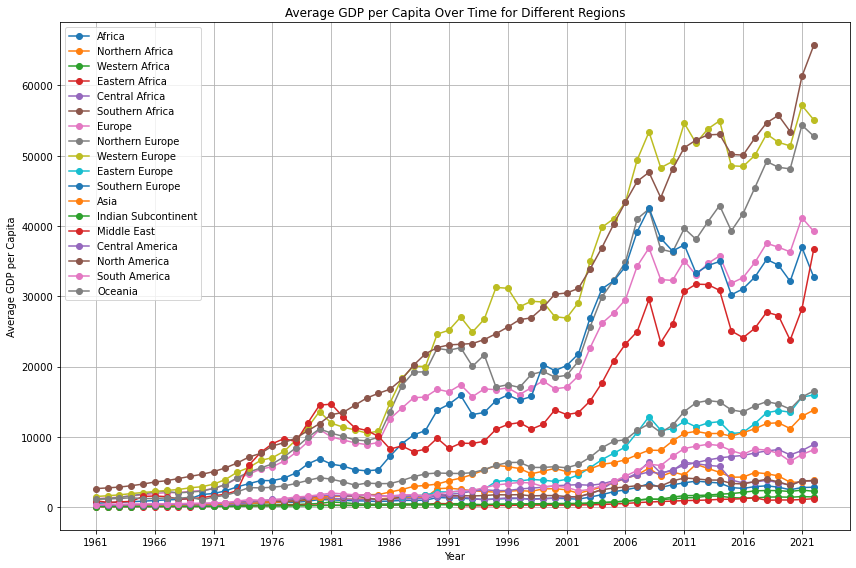

In [22]:
import pandas as pd

import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# You may need to adjust the column names based on your actual DataFrame

# List of regions and their corresponding country lists
regions = {
    'Africa': africa_countries,
    "Northern Africa": northern_africa_countries,
    "Western Africa": west_africa_countries,
    "Eastern Africa": eastern_africa_countries,
    "Central Africa": central_africa_countries,
    "Southern Africa": southern_africa_countries,
    'Europe': europe_countries,
    "Northern Europe": northern_europe,
    "Western Europe": western_europe,
    "Eastern Europe": eastern_europe,
    "Southern Europe": southern_europe,
    'Asia': asia_countries,
    'Indian Subcontinent': indian_subcontinent_countries,
    'Middle East': middle_east_countries,
    'Central America': central_america_countries,
    'North America': north_america_countries,
    'South America': south_america_countries,
    'Oceania': oceania_countries
}

# Function to calculate the average GDP per capita for a list of countries
def calculate_avg_gdp_per_capita(countries, df):
    data = df[df['Country Name'].isin(countries)].iloc[:, 2:].apply(pd.to_numeric, errors='coerce').fillna(df.iloc[:, 2:].mean(numeric_only=True))
    avg_gdp = data.mean(axis=0)
    return avg_gdp

# Plotting
plt.figure(figsize=(12, 8))

for region, countries in regions.items():
    avg_gdp_per_capita = calculate_avg_gdp_per_capita(countries, df)
    plt.plot(avg_gdp_per_capita.index, avg_gdp_per_capita, label=region, marker='o')

plt.xlabel('Year')
plt.ylabel('Average GDP per Capita')
plt.title('Average GDP per Capita Over Time for Different Regions')
plt.legend()
plt.grid(True)
plt.xticks(avg_gdp_per_capita.index[::5])  # Display every 5th year on the x-axis
plt.tight_layout()
plt.show()


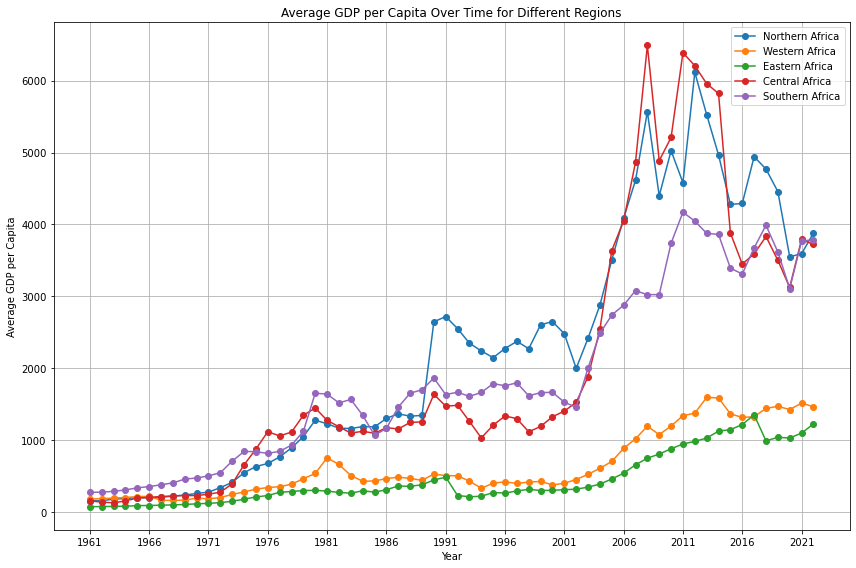

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# You may need to adjust the column names based on your actual DataFrame

# List of regions and their corresponding country lists
regions = {
    
    "Northern Africa": northern_africa_countries,
    "Western Africa": west_africa_countries,
    "Eastern Africa": eastern_africa_countries,
    "Central Africa": central_africa_countries,
    "Southern Africa": southern_africa_countries,
    
}

# Function to calculate the average GDP per capita for a list of countries
def calculate_avg_gdp_per_capita(countries, df):
    data = df[df['Country Name'].isin(countries)].iloc[:, 2:].apply(pd.to_numeric, errors='coerce').fillna(df.iloc[:, 2:].mean(numeric_only=True))
    avg_gdp = data.mean(axis=0)
    return avg_gdp
# Plotting
plt.figure(figsize=(12, 8))

for region, countries in regions.items():
    avg_gdp_per_capita = calculate_avg_gdp_per_capita(countries, df)
    plt.plot(avg_gdp_per_capita.index, avg_gdp_per_capita, label=region, marker='o')

plt.xlabel('Year')
plt.ylabel('Average GDP per Capita')
plt.title('Average GDP per Capita Over Time for Different Regions')
plt.legend()
plt.grid(True)
plt.xticks(avg_gdp_per_capita.index[::5])  # Display every 5th year on the x-axis
plt.tight_layout()
plt.show()


/Users/saketmanolkar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/saketmanolkar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


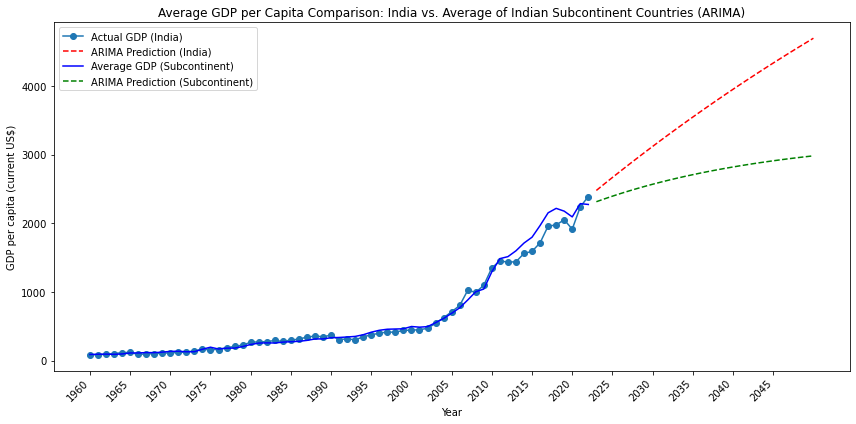

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming your DataFrame is named df
# Select data for India
df_india = df[df['Country Name'] == 'India']

# Drop rows with missing values
df_india = df_india.dropna()

# Extract the years and GDP values without specifying column names
years_india = df_india.columns[1:].values.astype(int)
gdp_values_india = df_india.iloc[0, 1:].replace('NA', np.nan).astype(float).values

# Filter data for training only on years 1960 to 2022 for India
start_year_india = 1960
end_year_india = 2022
mask_india = (years_india >= start_year_india) & (years_india <= end_year_india)

years_india_training = years_india[mask_india]
gdp_values_india_training = gdp_values_india[mask_india]

# Create an ARIMA model for India
model_india = ARIMA(gdp_values_india_training, order=(2, 1, 1))
fit_india = model_india.fit()

# Predict GDP values for future years (e.g., till 2050) for India
future_years_india = np.arange(2023, 2051)
predicted_gdp_india = fit_india.forecast(steps=len(future_years_india))

# Select data for countries in the Indian subcontinent
subcontinent_countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal']
df_subcontinent = df[df['Country Name'].isin(subcontinent_countries)]

# Fill NA values with 0
df_subcontinent = df_subcontinent.fillna(0)

# Extract the years and GDP values without specifying column names
years_subcontinent = df_subcontinent.columns[1:].values.astype(int)
gdp_values_subcontinent = df_subcontinent.iloc[:, 1:].replace('NA', np.nan).astype(float).values

# Filter data for training only on years 2000 to 2022 for the subcontinent
mask_subcontinent = (years_subcontinent >= start_year_india) & (years_subcontinent <= end_year_india)

years_subcontinent_training = years_subcontinent[mask_subcontinent]
gdp_values_subcontinent_training = gdp_values_subcontinent[:, mask_subcontinent]

# Create an ARIMA model for the subcontinent
model_subcontinent = ARIMA(np.mean(gdp_values_subcontinent_training, axis=0), order=(2, 1, 1))
fit_subcontinent = model_subcontinent.fit()

# Predict GDP values for future years for the subcontinent
predicted_gdp_subcontinent = fit_subcontinent.forecast(steps=len(future_years_india))

# Set a larger plot size
plt.figure(figsize=(12, 6))

# Plot a line graph for India
plt.plot(years_india, gdp_values_india, label='Actual GDP (India)', marker='o', linestyle='-')

# Plot a line graph for the ARIMA prediction of India
plt.plot(future_years_india, predicted_gdp_india, label='ARIMA Prediction (India)', linestyle='--', color='red')

# Plot a line graph for the average GDP of the Indian subcontinent
plt.plot(years_subcontinent, np.mean(gdp_values_subcontinent, axis=0), label='Average GDP (Subcontinent)', linestyle='-', color='blue')

# Plot a line graph for the ARIMA prediction of the average of the Indian subcontinent
plt.plot(future_years_india, predicted_gdp_subcontinent, label='ARIMA Prediction (Subcontinent)', linestyle='--', color='green')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US$)')
plt.title('Average GDP per Capita Comparison: India vs. Average of Indian Subcontinent Countries (ARIMA)')
plt.legend()

# Increment x-axis ticks by 5
plt.xticks(range(1960, 2050, 5), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


/Users/saketmanolkar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


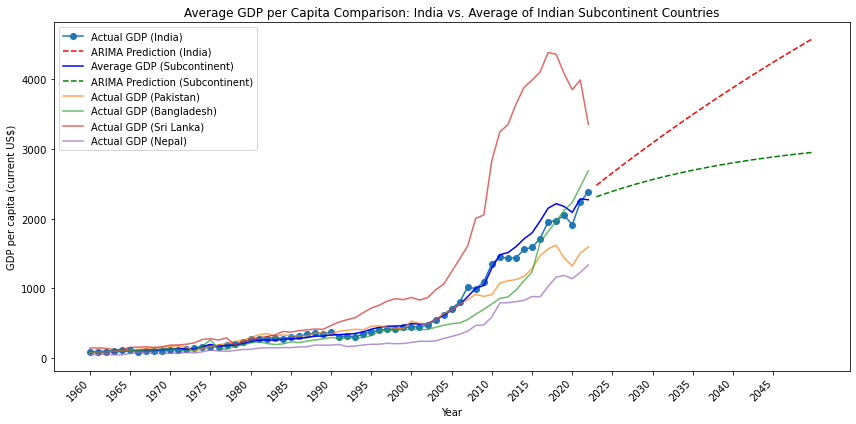

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming your DataFrame is named df
# Select data for India
df_india = df[df['Country Name'] == 'India']

# Drop rows with missing values
df_india = df_india.dropna()

# Extract the years and GDP values without specifying column names
years_india = df_india.columns[1:].values.astype(int)
gdp_values_india = df_india.iloc[0, 1:].replace('NA', np.nan).astype(float).values

# Filter data for training only on years 1960 to 2022 for India
start_year_india = 1960
end_year_india = 2022
mask_india = (years_india >= start_year_india) & (years_india <= end_year_india)

years_india_training = years_india[mask_india]
gdp_values_india_training = gdp_values_india[mask_india]

# Create an ARIMA model for India
model_india = ARIMA(gdp_values_india_training, order=(1, 1, 1))
model_india_fit = model_india.fit()

# Predict GDP values for future years (e.g., till 2050) for India
future_years_india = np.arange(2023, 2051)
predicted_gdp_india = model_india_fit.forecast(steps=len(future_years_india))

# Select data for countries in the Indian subcontinent
subcontinent_countries = ['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal']
df_subcontinent = df[df['Country Name'].isin(subcontinent_countries)]

# Fill NA values with 0
df_subcontinent = df_subcontinent.fillna(0)

# Extract the years and GDP values without specifying column names for the subcontinent
years_subcontinent = df_subcontinent.columns[1:].values.astype(int)
gdp_values_subcontinent = df_subcontinent.iloc[:, 1:].replace('NA', np.nan).astype(float).values

# Filter data for training only on years 2000 to 2022 for the subcontinent
mask_subcontinent = (years_subcontinent >= start_year_india) & (years_subcontinent <= end_year_india)

years_subcontinent_training = years_subcontinent[mask_subcontinent]
gdp_values_subcontinent_training = gdp_values_subcontinent[:, mask_subcontinent]

# Create an ARIMA model for the subcontinent
model_subcontinent = ARIMA(np.mean(gdp_values_subcontinent_training, axis=0), order=(1, 1, 1))
model_subcontinent_fit = model_subcontinent.fit()

# Predict GDP values for future years for the subcontinent
predicted_gdp_subcontinent = model_subcontinent_fit.forecast(steps=len(future_years_india))

# Set a larger plot size
plt.figure(figsize=(12, 6))

# Plot a line graph for India
plt.plot(years_india, gdp_values_india, label='Actual GDP (India)', marker='o', linestyle='-')

# Plot a line graph for the ARIMA prediction of India
plt.plot(future_years_india, predicted_gdp_india, label='ARIMA Prediction (India)', linestyle='--', color='red')

# Plot a line graph for the average GDP of the Indian subcontinent
plt.plot(years_subcontinent, np.mean(gdp_values_subcontinent, axis=0), label='Average GDP (Subcontinent)', linestyle='-', color='blue')

# Plot a line graph for the ARIMA prediction of the average of the Indian subcontinent
plt.plot(future_years_india, predicted_gdp_subcontinent, label='ARIMA Prediction (Subcontinent)', linestyle='--', color='green')

# Plot actual GDP per capita for all countries in the Indian subcontinent
for country in subcontinent_countries:
    if country != 'India':
        country_data = df[df['Country Name'] == country].iloc[:, 1:].replace('NA', np.nan).astype(float).values.flatten()
        plt.plot(years_subcontinent, country_data, label=f'Actual GDP ({country})', linestyle='-', alpha=0.7)

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US$)')
plt.title('Average GDP per Capita Comparison: India vs. Average of Indian Subcontinent Countries')
plt.legend()

# Increment x-axis ticks by 5
plt.xticks(range(1960, 2050, 5), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


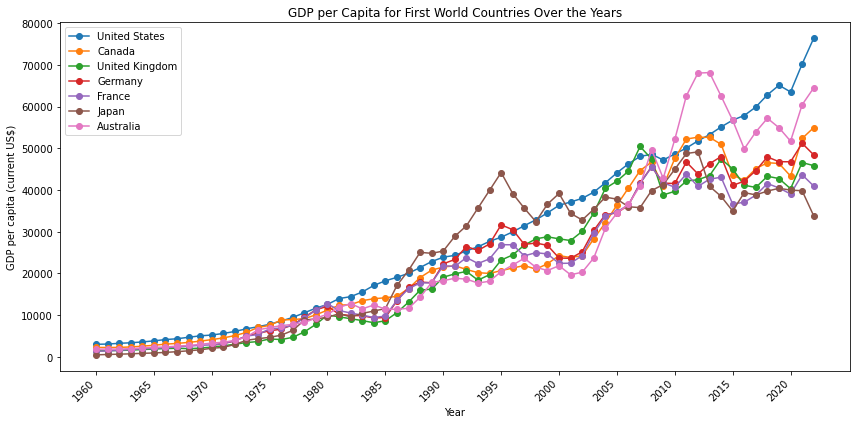

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
first_world_countries = ['United States', 'Canada', 'United Kingdom', 'Germany', 'France', 'Japan', 'Australia']

data_selected = df[df['Country Name'].isin(first_world_countries)].set_index('Country Name').T

# Fill NA values with 0
data_selected.fillna(0, inplace=True)

# Convert all values to numeric
data_selected = data_selected.apply(pd.to_numeric, errors='coerce')

# Set a larger plot size
plt.figure(figsize=(12, 6))

# Plot a line graph for each first-world country
for country in first_world_countries:
    plt.plot(data_selected.index, data_selected[country], label=country, marker='o', linestyle='-')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US$)')
plt.title('GDP per Capita for First World Countries Over the Years')
plt.legend()

# Increment x-axis ticks by 5
plt.xticks(range(0, len(data_selected.index), 5), data_selected.index[::5], rotation=45, ha='right')

# Show the actual values on the y-axis
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)

# Show the plot
plt.tight_layout()
plt.show()


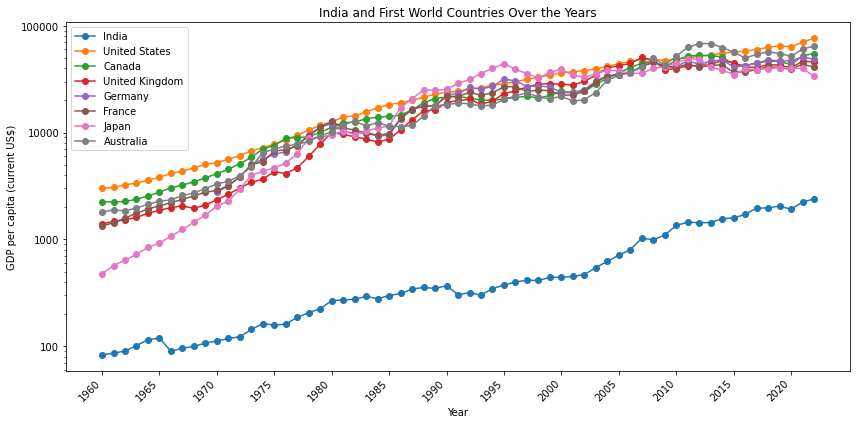

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Assuming your DataFrame is named df
first_world_countries = ['United States', 'Canada', 'United Kingdom', 'Germany', 'France', 'Japan', 'Australia']
countries_of_interest = ['India'] + first_world_countries

data_selected = df[df['Country Name'].isin(countries_of_interest)].set_index('Country Name').T

# Fill NA values with 0
data_selected.fillna(0, inplace=True)

# Convert all values to numeric
data_selected = data_selected.apply(pd.to_numeric, errors='coerce')

# Set a larger plot size
plt.figure(figsize=(12, 6))

# Plot data for each country
for country in countries_of_interest:
    plt.plot(data_selected.index, data_selected[country], label=country, marker='o', linestyle='-')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US$)')
plt.title('India and First World Countries Over the Years')
plt.legend()

# Increment x-axis ticks by 5
plt.xticks(range(0, len(data_selected.index), 5), data_selected.index[::5], rotation=45, ha='right')

# Use a logarithmic scale for the y-axis
plt.yscale('log')

# Use ScalarFormatter for the y-axis ticks
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Show the plot
plt.tight_layout()
plt.show()


/Users/saketmanolkar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/saketmanolkar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted GDP per Capita for Future Years (India):
    Year  Predicted GDP (India)
0   2023            2476.983413
1   2024            2572.550747
2   2025            2665.941599
3   2026            2758.440568
4   2027            2849.886837
5   2028            2940.315293
6   2029            3029.734161
7   2030            3118.155132
8   2031            3205.589287
9   2032            3292.047645
10  2033            3377.541097
11  2034            3462.080411
12  2035            3545.676235
13  2036            3628.339099
14  2037            3710.079416
15  2038            3790.907481
16  2039            3870.833475
17  2040            3949.867467
18  2041            4028.019410
19  2042            4105.299149
20  2043            4181.716418
21  2044            4257.280843
22  2045            4332.001941
23  2046            4405.889125
24  2047            4478.951701
25  2048            4551.198872
26  2049            4622.639738
27  2050            4693.283298

Predicted Avg. GDP p

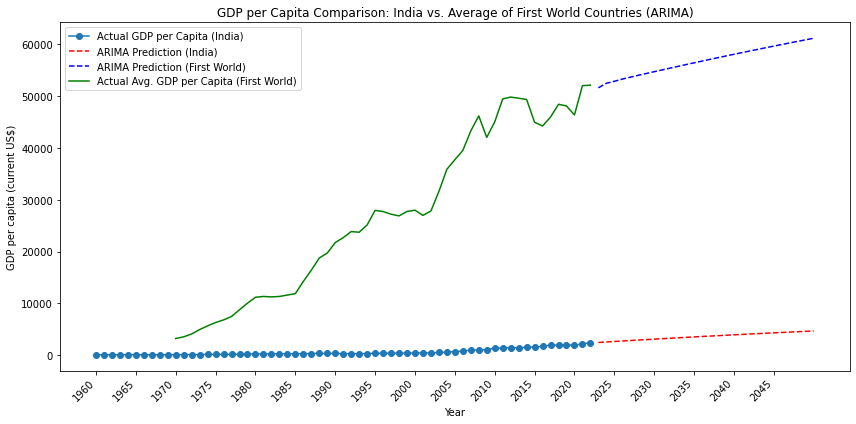

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming your DataFrame is named df

# Select data for India
df_india = df[df['Country Name'] == 'India']

# Drop rows with missing values
df_india = df_india.dropna()

# Extract the years and GDP values without specifying column names
years_india = df_india.columns[1:].values.astype(int)
gdp_values_india = df_india.iloc[0, 1:].replace('NA', np.nan).astype(float).values

# Filter data for training only on years 1960 to 2022 for India
start_year_india = 1960
end_year_india = 2022
mask_india = (years_india >= start_year_india) & (years_india <= end_year_india)

years_india_training = years_india[mask_india]
gdp_values_india_training = gdp_values_india[mask_india]

# Create an ARIMA model for India
model_india = ARIMA(gdp_values_india_training, order=(2, 1, 1))
fit_india = model_india.fit()

# Predict GDP values for future years (e.g., till 2050) for India
future_years_india = np.arange(2023, 2051)
predicted_gdp_india = fit_india.forecast(steps=len(future_years_india))

# Select data for first-world countries
first_world_countries = ['United States', 'Canada', 'United Kingdom', 'Germany', 'France', 'Japan', 'Australia']
df_first_world = df[df['Country Name'].isin(first_world_countries)]

# Fill NA values with 0
df_first_world = df_first_world.fillna(0)

# Extract the years and GDP values without specifying column names for the first-world countries
years_first_world = np.array(df_first_world.columns[1:]).astype(int)
gdp_values_first_world = df_first_world.iloc[:, 1:].replace('NA', np.nan).astype(float).values

# Filter data for training only on years 1960 to 2022 for the first-world countries
mask_first_world = (years_first_world >= start_year_india) & (years_first_world <= end_year_india)

years_first_world_training = years_first_world[mask_first_world]
gdp_values_first_world_training = gdp_values_first_world[:, mask_first_world]

# Create an ARIMA model for each first-world country and get predictions
predictions_first_world = []
for i in range(gdp_values_first_world_training.shape[0]):
    model_first_world = ARIMA(gdp_values_first_world_training[i, :], order=(2, 1, 1))
    fit_first_world = model_first_world.fit()
    predicted_gdp_first_world_country = fit_first_world.forecast(steps=len(future_years_india))
    predictions_first_world.append(predicted_gdp_first_world_country)

# Calculate the average of predictions for the first-world countries
predicted_gdp_first_world = np.mean(predictions_first_world, axis=0)

# Print predicted values for future years for India
predicted_df_india = pd.DataFrame({'Year': future_years_india.flatten(), 'Predicted GDP (India)': predicted_gdp_india.flatten()})
print("Predicted GDP per Capita for Future Years (India):")
print(predicted_df_india)

# Print predicted values for future years for the average of first-world countries
predicted_df_first_world = pd.DataFrame({'Year': future_years_india.flatten(), 'Predicted Avg. GDP (First World)': predicted_gdp_first_world.flatten()})
print("\nPredicted Avg. GDP per Capita for Future Years (First World):")
print(predicted_df_first_world)

# Set a larger plot size
plt.figure(figsize=(12, 6))

# Plot a line graph for India
plt.plot(years_india, gdp_values_india, label='Actual GDP per Capita (India)', marker='o', linestyle='-')

# Plot a line graph for the ARIMA prediction of India
plt.plot(future_years_india, predicted_gdp_india, label='ARIMA Prediction (India)', linestyle='--', color='red')

# Plot a line graph for the ARIMA prediction of the average of first-world countries
plt.plot(future_years_india, predicted_gdp_first_world, label='ARIMA Prediction (First World)', linestyle='--', color='blue')

# Plot a line graph for the actual GDP of the average of first-world countries
plt.plot(years_first_world, np.mean(gdp_values_first_world, axis=0), label='Actual Avg. GDP per Capita (First World)', linestyle='-', color='green')


# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('GDP per capita (current US$)')
plt.title('GDP per Capita Comparison: India vs. Average of First World Countries (ARIMA)')
plt.legend()

# Increment x-axis ticks by 5
plt.xticks(range(1960, 2050, 5), rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
